##Load Data

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
df_churn=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn.xlsx')
df_population=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn_population.xlsx')
df_service=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn_services.xlsx')
df_status=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn_status.xlsx')
df_demograph=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn_demographics.xlsx')
df_loc=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn_location.xlsx')

## Studying and Merging Data

In [168]:
df_churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [169]:
#change column name to make it as all dataset so we merge it
df_churn.rename(columns={'CustomerID':'Customer ID'},inplace=True)

In [170]:
#merging datasets
df_m1=pd.merge(df_service,df_status)
df_m2=pd.merge(df_loc,df_population)
df_m3=pd.merge(df_m1,df_m2)
df_m4=pd.merge(df_demograph,df_churn)
df=pd.merge(df_m3,df_m4,on='Customer ID',suffixes=('','__d'))


In [171]:
df.head()


,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract__d,Paperless Billing__d,Payment Method__d,Monthly Charges,Total Charges__d,Churn Label__d,Churn Value__d,Churn Score__d,CLTV__d,Churn Reason__d
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes,1,69,5302,Competitor made better offer
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,1,81,3179,Competitor made better offer
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-month,Yes,Electronic check,98.50,2514.5,Yes,1,88,5337,Limited range of services
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes,1,67,2793,Extra data charges


In [172]:
#drop duplicated columns
df=df.drop([col for col in df.columns if '__d' in col],axis=1)

In [173]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Partner,Tenure Months,Device Protection,Tech Support,Monthly Charges
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Yes,No,No,0,No,1,Yes,No,39.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,No,Yes,Yes,Yes,1,Yes,8,No,No,80.65
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,No,Yes,No,Yes,3,No,18,No,No,95.45
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,No,Yes,Yes,Yes,1,Yes,25,Yes,No,98.50
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,No,Yes,Yes,Yes,1,Yes,37,No,No,76.50


In [174]:
df.columns


Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'ID', 'Population', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',

In [175]:
#study columns
print(df['Count'].unique())
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Churn Label'].unique())
#print(df['Churn Score'].unique())
print(df['Churn Value'].unique())
print(df['Paperless Billing'].unique())
print(df['Streaming Movies'].unique())
print(df['State'].unique())
print(df['City'].unique())
print(df['Country'].unique())
print(df['ID'].unique())
print(df['Partner'].unique())
#print(df['Churn Reason'].unique())
print(df['Internet Type'].unique())
print(df['Senior Citizen'].unique())


[1]
['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
[1 0]
['Yes' 'No']
['Yes' 'No']
['California']
['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
['United States']
[ 21  54  56 ... 303 357 404]
['No' 'Yes']
['DSL' 'Fiber Optic' 'Cable' 'None']
['Yes' 'No']


#EDA

##Data Analaysis

In [12]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Partner,Tenure Months,Device Protection,Tech Support,Monthly Charges
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Yes,No,No,0,No,1,Yes,No,39.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,No,Yes,Yes,Yes,1,Yes,8,No,No,80.65
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,No,Yes,No,Yes,3,No,18,No,No,95.45
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,No,Yes,Yes,Yes,1,Yes,25,Yes,No,98.50
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,No,Yes,Yes,Yes,1,Yes,37,No,No,76.50


In [13]:
df.shape

(7043, 59)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [15]:
print(df_demograph.shape)
print(df_churn.shape)
print(df_loc.shape)
print(df_population.shape)
print(df_status.shape)
print(df_service.shape)
#there is no missing values

(7043, 9)
(7043, 33)
(7043, 9)
(1671, 3)
(7043, 11)
(7043, 30)


In [16]:
df.isna().sum().sum()
#All nan values are in churn_reasons and churn_category by ratio 1:1

10348

In [17]:
df.duplicated().sum()
#there is no duplication

0

In [18]:
df.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,CLTV,Zip Code,Latitude,Longitude,ID,Population,Age,Number of Dependents,Tenure Months,Monthly Charges
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,...,4400.295755,93486.070567,36.197455,-119.756684,784.800653,22139.603294,46.509726,0.468692,32.371149,64.761692
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,...,1183.057152,1856.767505,2.468929,2.154425,489.044050,21152.392837,16.750352,0.962802,24.559481,30.090047
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,...,2003.000000,90001.000000,32.555828,-124.301372,1.000000,11.000000,19.000000,0.000000,0.000000,18.250000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,...,3469.000000,92101.000000,33.990646,-121.788090,353.000000,2344.000000,32.000000,0.000000,9.000000,35.500000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,...,4527.000000,93518.000000,36.205465,-119.595293,759.000000,17554.000000,46.000000,0.000000,29.000000,70.350000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,...,5380.500000,95329.000000,38.161321,-117.969795,1208.000000,36125.000000,60.000000,0.000000,55.000000,89.850000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,...,6500.000000,96150.000000,41.962127,-114.192901,1670.000000,105285.000000,80.000000,9.000000,72.000000,118.750000


## Data Visualization

###Looking at data of custmor service

In [19]:
df_service.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [20]:
df_service.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [21]:
#function to diplay countplot of four features
def plot_count(f1,f2,f3,f4):
   fig,axes=plt.subplots(2,2,figsize=(15,12))
   sns.countplot(data=df,x=f1,order=df[f1].value_counts().index,ax=axes[0,0]).set_title(f1)
   sns.countplot(data=df,x=f2,order=df[f2].value_counts().index,ax=axes[0,1]).set_title(f2)
   sns.countplot(data=df,x=f3,order=df[f3].value_counts().index,ax=axes[1,0]).set_title(f3)
   sns.countplot(data=df,x=f4,order=df[f4].value_counts().index,ax=axes[1,1]).set_title(f4)
  

In [22]:
#function to diplay boxplot of four features
def plot_box(f1,f2,f3,f4):
   fig,axes=plt.subplots(2,2,figsize=(15,12))
   sns.boxplot(data=df,x=f1,ax=axes[0,0]).set_title(f1)
   sns.boxplot(data=df,x=f2,ax=axes[0,1]).set_title(f2)
   sns.boxplot(data=df,x=f3,ax=axes[1,0]).set_title(f3)
   sns.boxplot(data=df,x=f4,ax=axes[1,1]).set_title(f4)
  

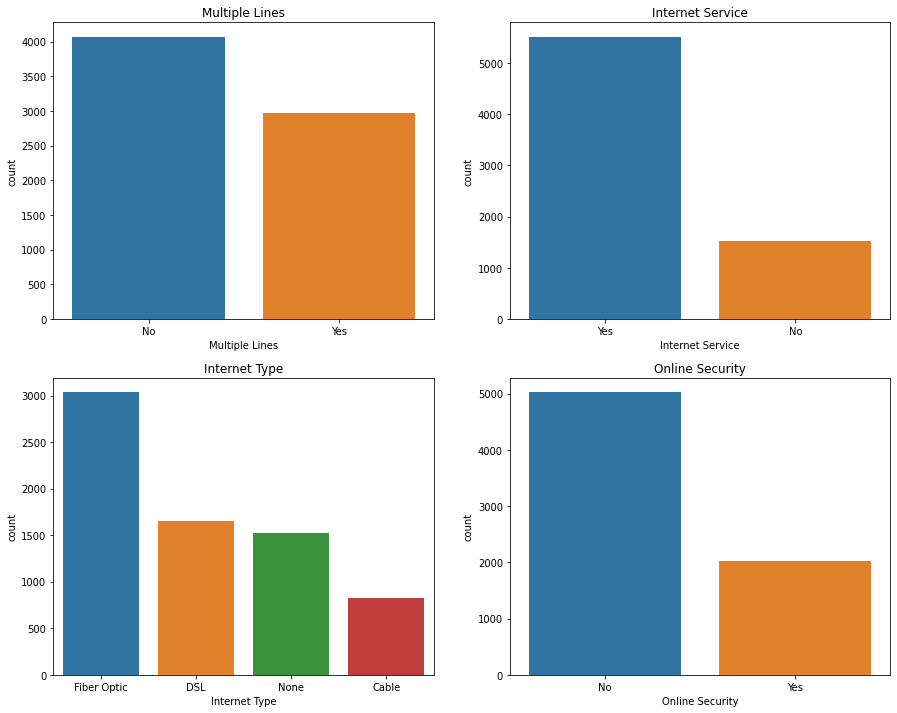

In [23]:
plot_count('Multiple Lines','Internet Service', 'Internet Type','Online Security')


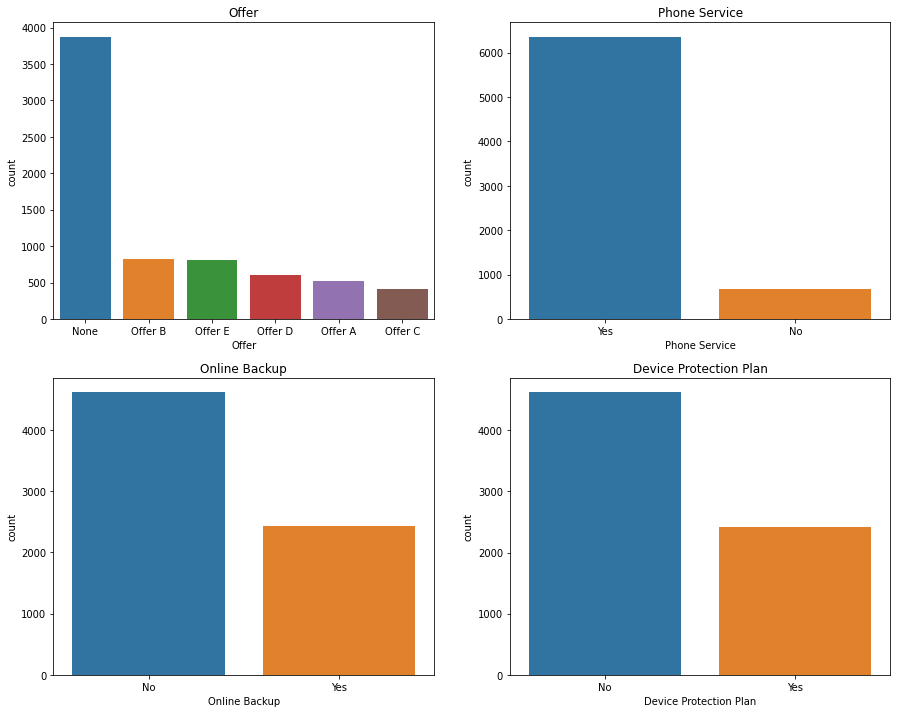

In [24]:
plot_count('Offer', 'Phone Service','Online Backup', 'Device Protection Plan')

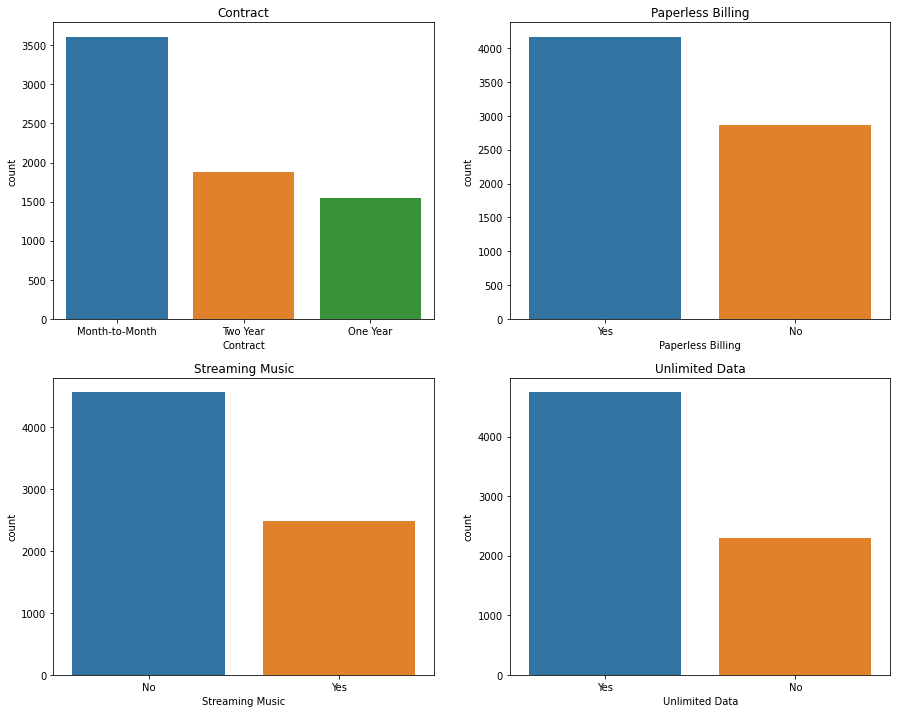

In [25]:
plot_count('Contract', 'Paperless Billing','Streaming Music', 'Unlimited Data')

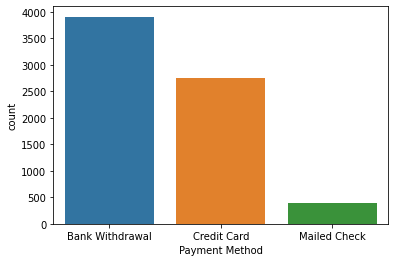

In [26]:
sns.countplot(data=df,x='Payment Method')

In [27]:
df_service.corr()
#tenur of month with total revenue
#total long distance with revenue and charges


,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Referrals,NaN,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,NaN,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,NaN,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291
Avg Monthly GB Download,NaN,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726
Monthly Charge,NaN,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887
Total Charges,NaN,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212
Total Refunds,NaN,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984
Total Extra Data Charges,NaN,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496
Total Long Distance Charges,NaN,0.216190,0.674149,0.599828,0.011373,0.246300,0.610185,0.028113,0.058871,1.000000,0.778559


In [28]:
#function to represent relation between two features
def func_plot(f1_name,f2_name):
  fig,axes=plt.subplots(2,2,figsize=(12,15))
  sns.lineplot(data=df,x=f1_name,y=f2_name,ax=axes[0,0]).set(title="Lineplot")
  sns.barplot(data=df,x=f1_name,y=f2_name,ax=axes[0,1]).set(title="Barplot")
  sns.scatterplot(data=df,x=f1_name,y=f2_name,ax=axes[1,0]).set(title="Scatterplot")
  sns.histplot(data=df,x=f1_name,y=f2_name,ax=axes[1,1]).set(title="Histplot")

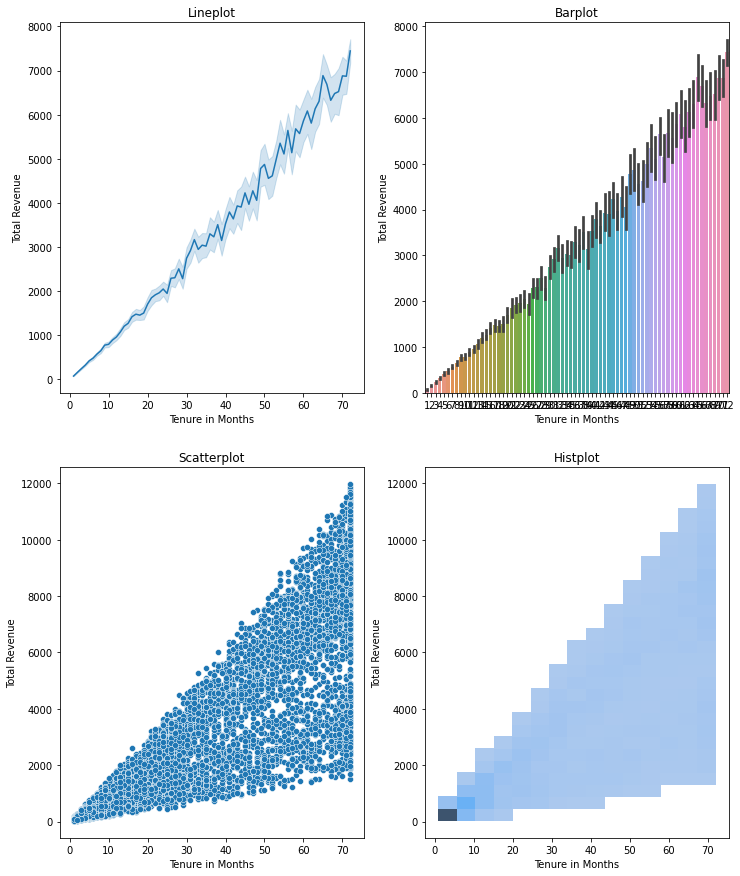

In [29]:
func_plot('Tenure in Months','Total Revenue')

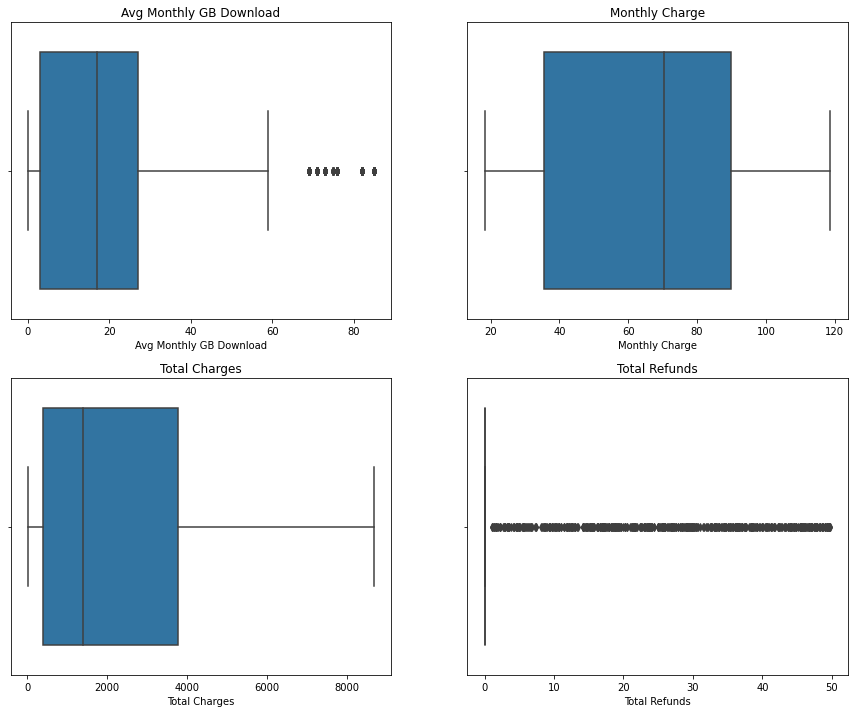

In [30]:
plot_box('Avg Monthly GB Download','Monthly Charge', 'Total Charges','Total Refunds')

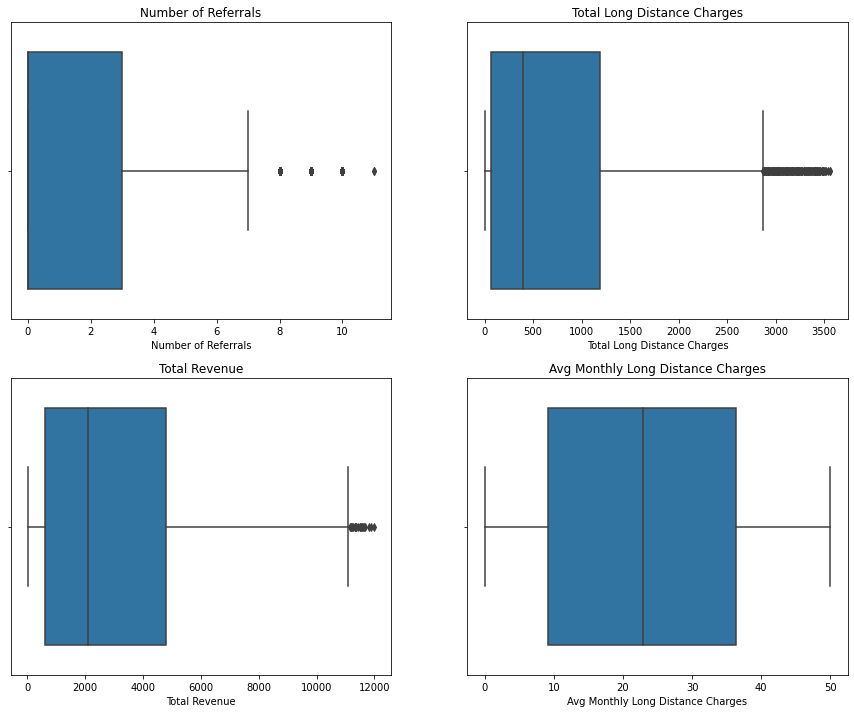

In [31]:
plot_box( 'Number of Referrals', 'Total Long Distance Charges','Total Revenue','Avg Monthly Long Distance Charges')
#total extra data charges have many outliers

### Looking at data of demograph

In [32]:
df_demograph.describe()

,Count,Age,Number of Dependents
count,7043.0,7043.000000,7043.000000
mean,1.0,46.509726,0.468692
std,0.0,16.750352,0.962802
min,1.0,19.000000,0.000000
25%,1.0,32.000000,0.000000
50%,1.0,46.000000,0.000000
75%,1.0,60.000000,0.000000
max,1.0,80.000000,9.000000


In [33]:
df_demograph.columns

Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents'],
      dtype='object')

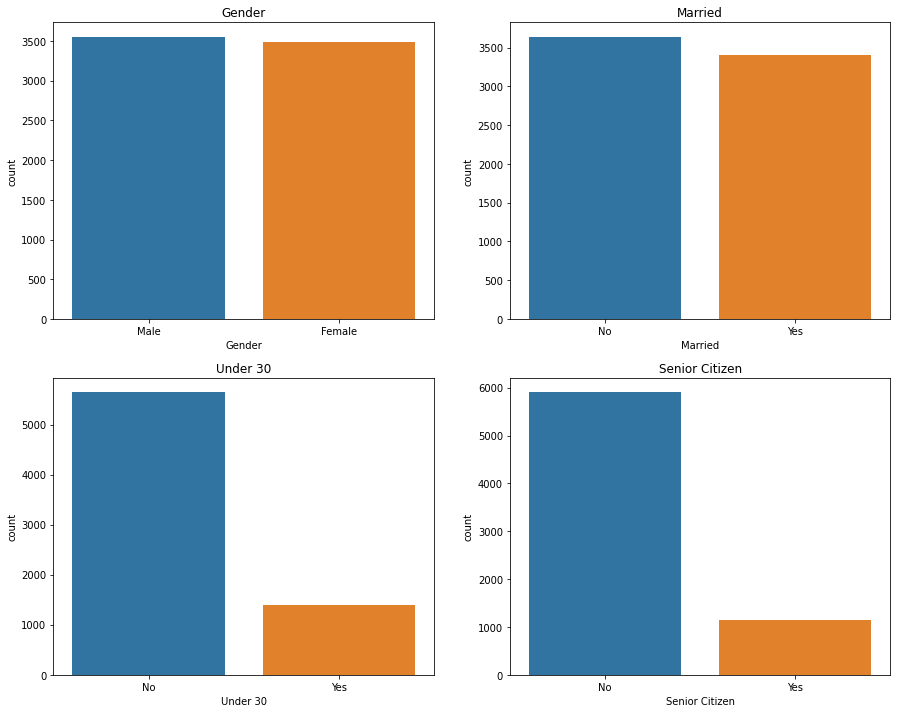

In [34]:
plot_count('Gender', 'Married', 'Under 30', 'Senior Citizen')

Text(0.5, 1.0, 'Number of Dependents')

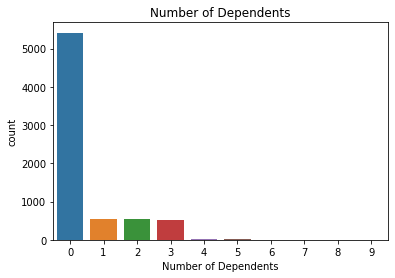

In [35]:
sns.countplot(data=df,x='Number of Dependents').set_title('Number of Dependents')

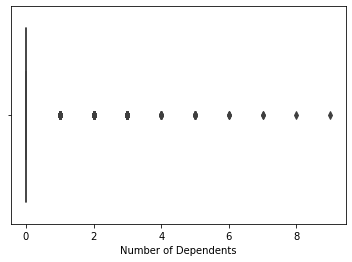

In [36]:
sns.boxplot(data=df,x='Number of Dependents')

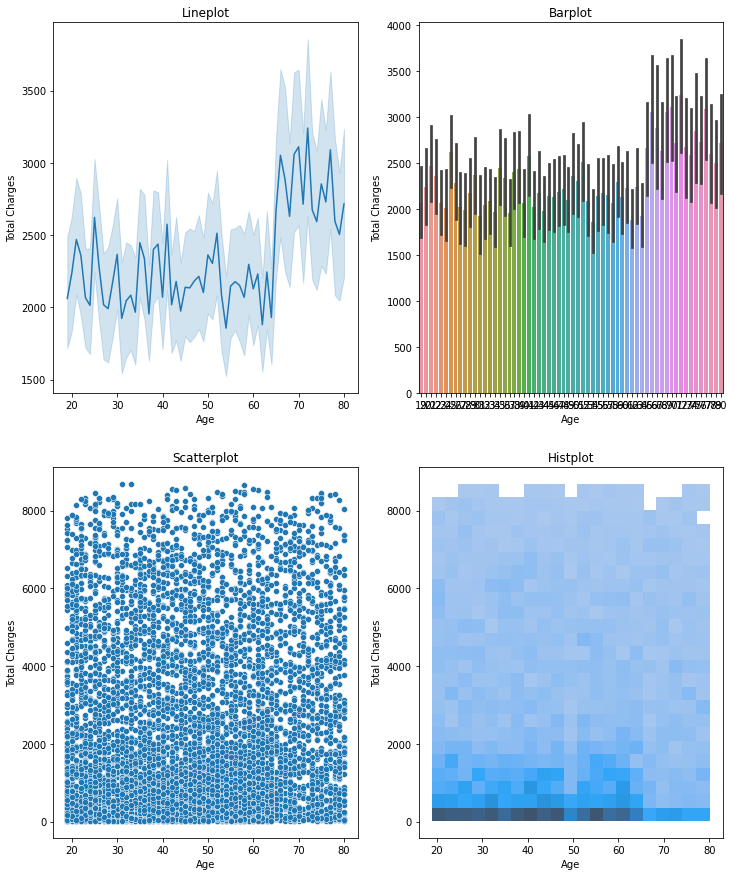

In [37]:
func_plot('Age','Total Charges')

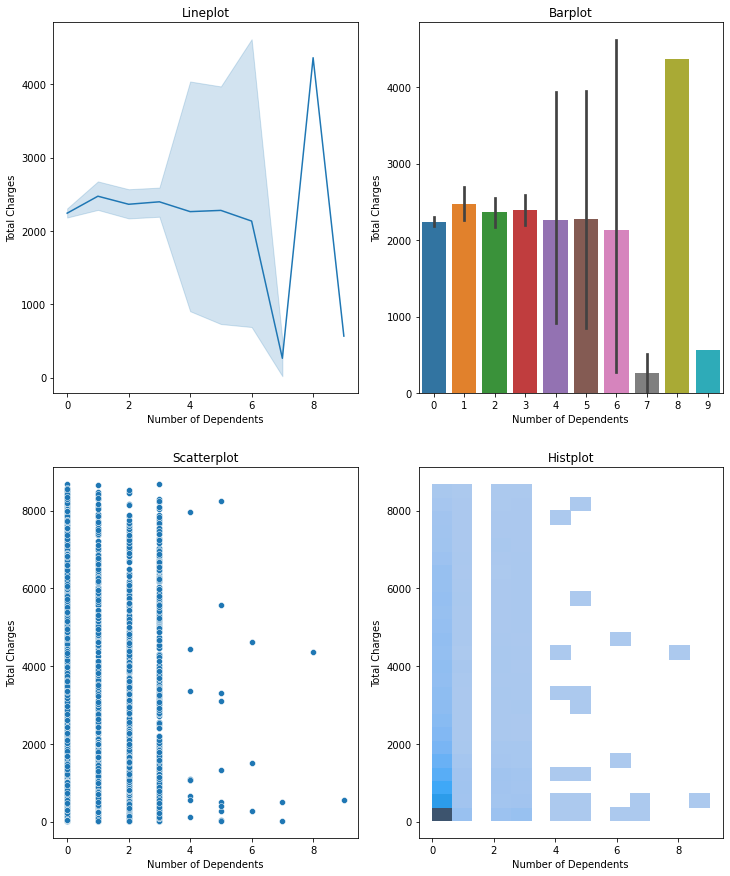

In [38]:
func_plot('Number of Dependents','Total Charges')

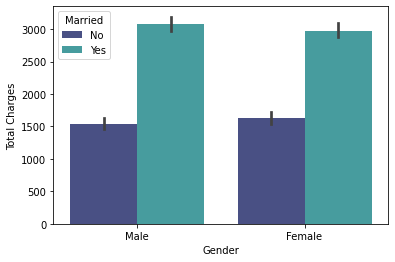

In [39]:
sns.barplot(data=df,x='Gender',y='Total Charges',hue='Married',palette='mako')
#no relation

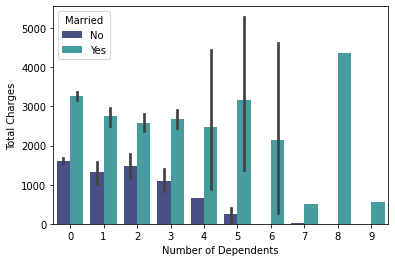

In [40]:
sns.barplot(data=df,x='Number of Dependents',y='Total Charges',hue='Married',palette='mako')

### Looking for data of status

In [41]:
df_status.describe()

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,5.000000,1.000000,96.000000,6500.000000


In [42]:
df_status.corr()
#satsifiction score rel. with value and score

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
Count,NaN,NaN,NaN,NaN,NaN
Satisfaction Score,NaN,1.000000,-0.754649,-0.495144,0.075811
Churn Value,NaN,-0.754649,1.000000,0.660772,-0.127463
Churn Score,NaN,-0.495144,0.660772,1.000000,-0.079232
CLTV,NaN,0.075811,-0.127463,-0.079232,1.000000


In [43]:
df_status.columns

Index(['Customer ID', 'Count', 'Quarter', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason'],
      dtype='object')

Text(0.5, 1.0, 'Bar plot between Score and Label')

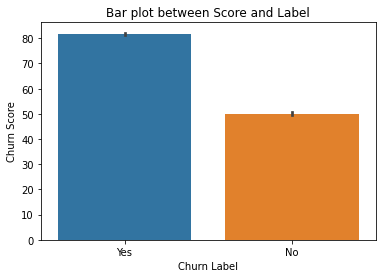

In [44]:
sns.barplot(data=df,x='Churn Label',y='Churn Score').set_title("Bar plot between Score and Label")
#water fall is better

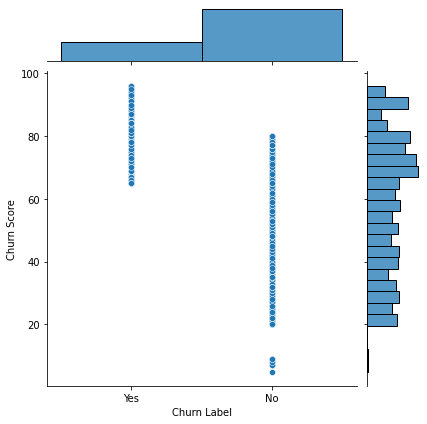

In [45]:
sns.jointplot(data=df,x='Churn Label',y='Churn Score')
#when score is greater than 80 label is yes

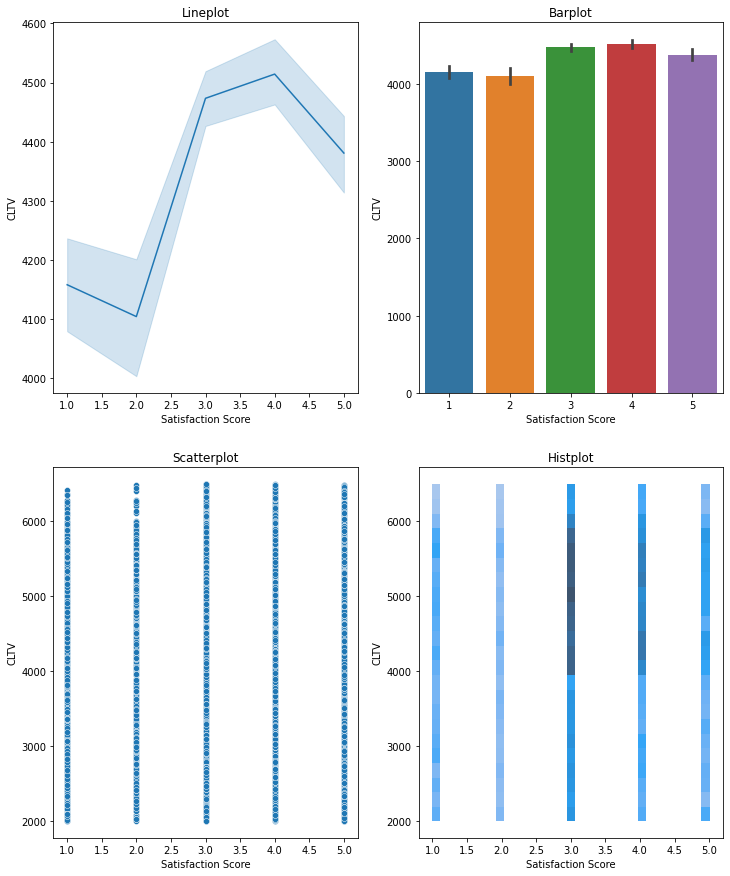

In [46]:
func_plot('Satisfaction Score','CLTV')
#Sat score is directly prop with CLTV

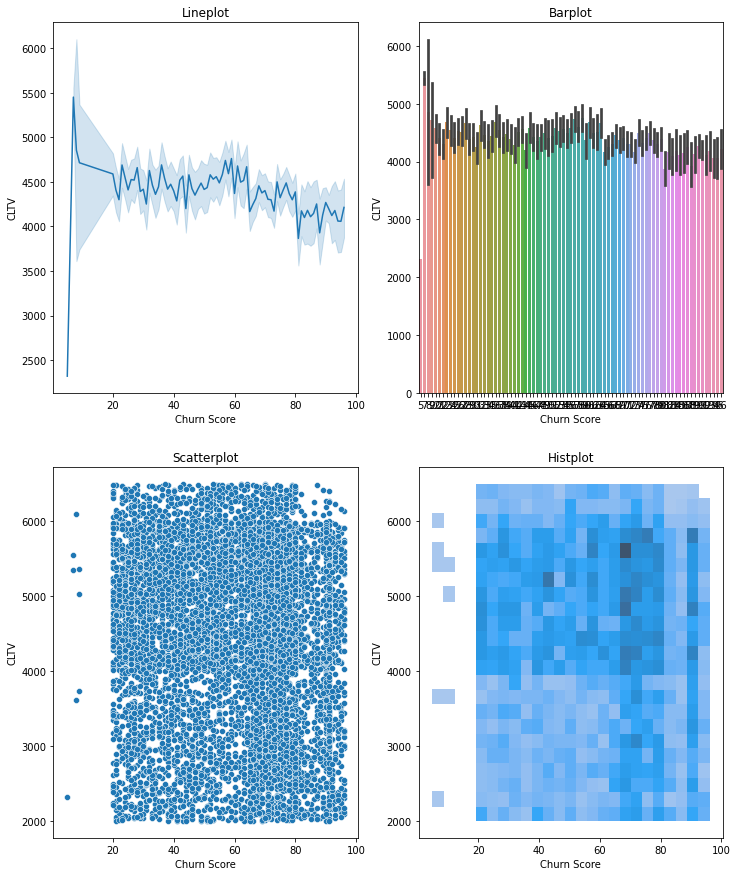

In [47]:
func_plot('Churn Score', 'CLTV')

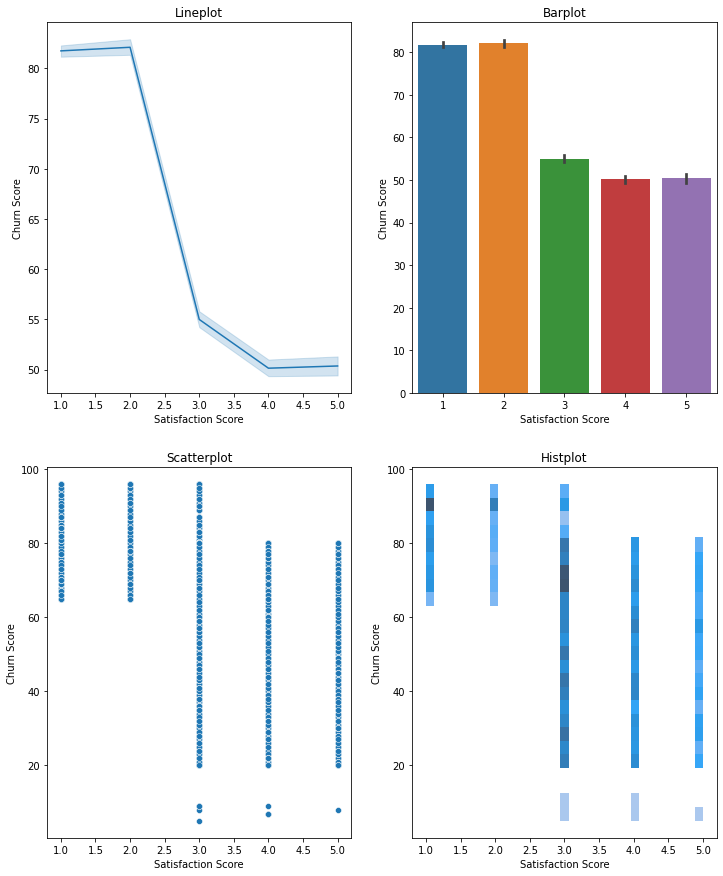

In [48]:
func_plot('Satisfaction Score','Churn Score')

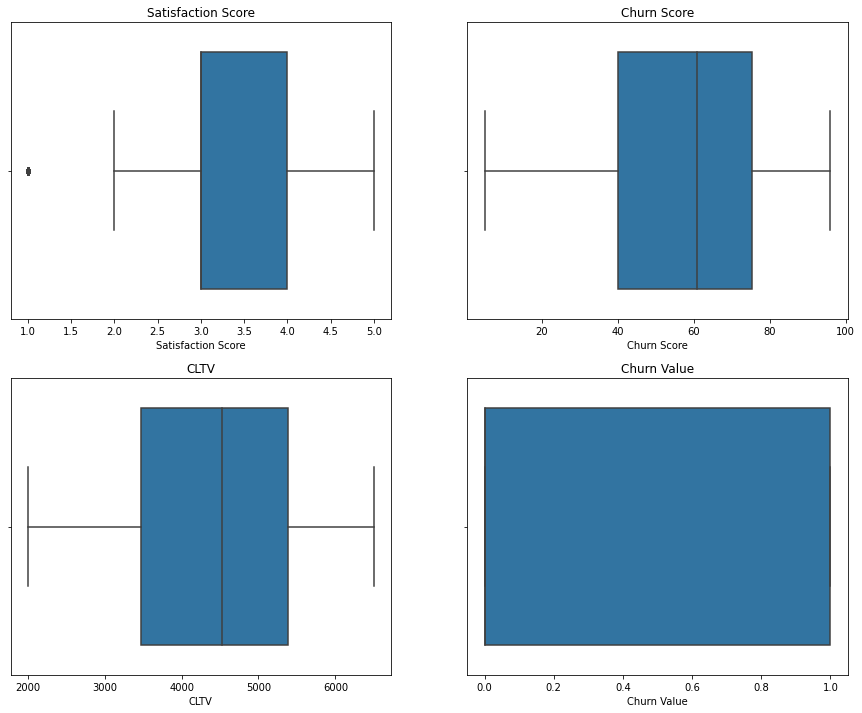

In [49]:
plot_box('Satisfaction Score','Churn Score', 'CLTV','Churn Value')

###Looking at data set of location and population

In [50]:
df_m2.corr()

,Count,Zip Code,Latitude,Longitude,ID,Population
Count,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.894769,-0.790564,0.987620,-0.424067
Latitude,NaN,0.894769,1.000000,-0.885979,0.926717,-0.434801
Longitude,NaN,-0.790564,-0.885979,1.000000,-0.795713,0.296288
ID,NaN,0.987620,0.926717,-0.795713,1.000000,-0.434800
Population,NaN,-0.424067,-0.434801,0.296288,-0.434800,1.000000


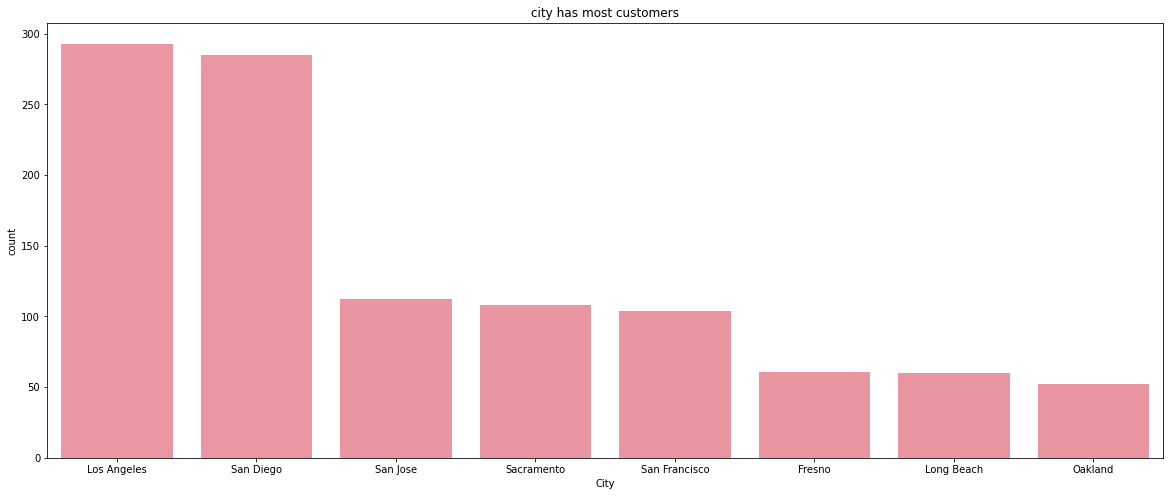

In [51]:
plt.figure(figsize=(20,8))
a=sns.countplot(data=df,x='City',order=df['City'].value_counts().index)
a.set_xlim(-0.5,7.5)
a.set_title("city has most customers")
plt.show()

Text(0.5, 1.0, 'City with highest Population')

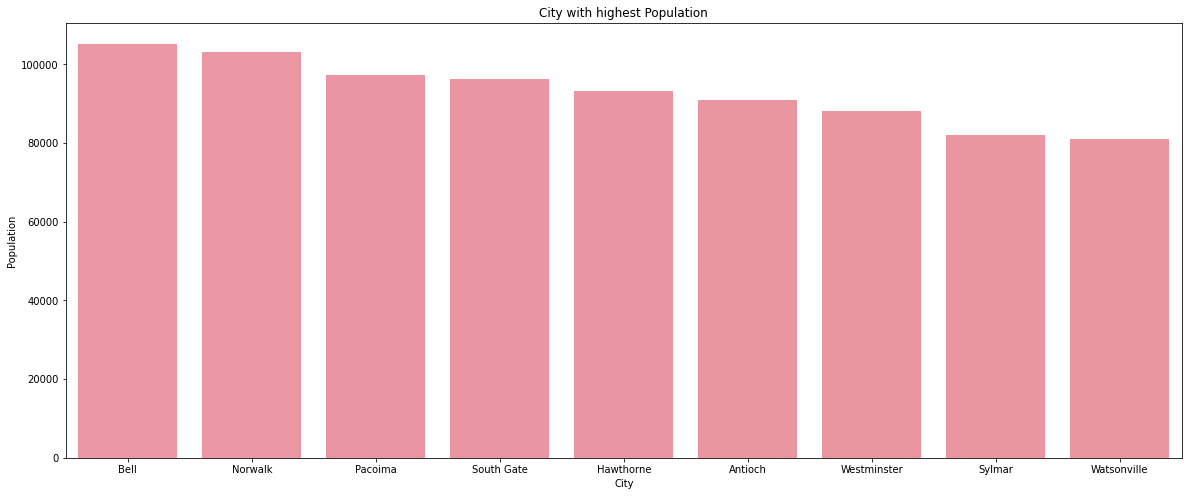

In [52]:
plt.figure(figsize=(20,8))
order=df.groupby(['City'])['Population'].mean().sort_values(ascending=False).index
b=sns.barplot(data=df,x='City',y='Population',order=order)
b.set_xlim(-0.5,8.5)
b.set_title("City with highest Population")

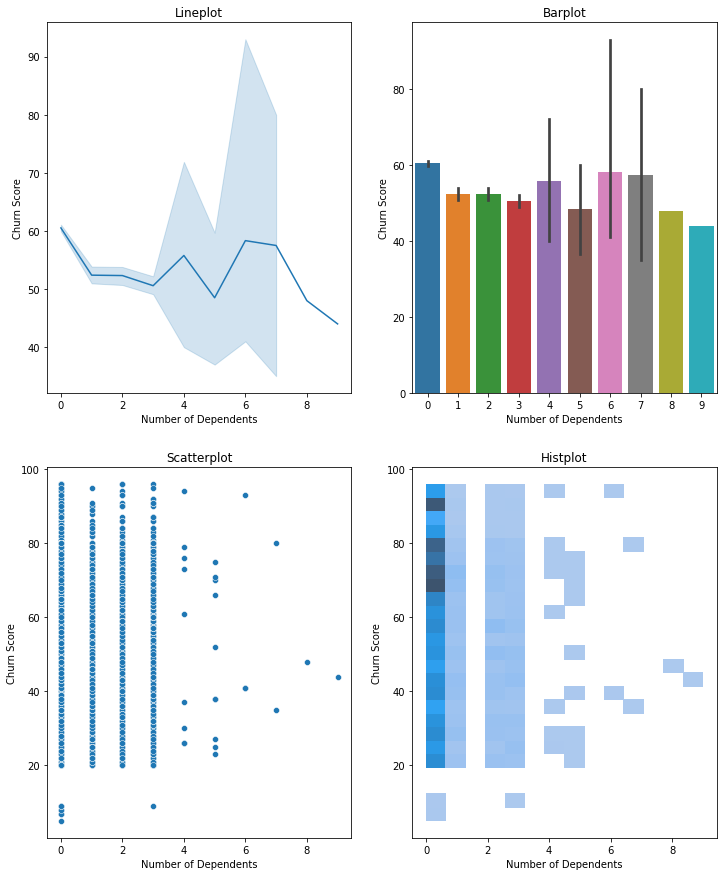

In [53]:
func_plot('Number of Dependents','Churn Score')

In [157]:
#func_plot('Total Charges','Churn Score')

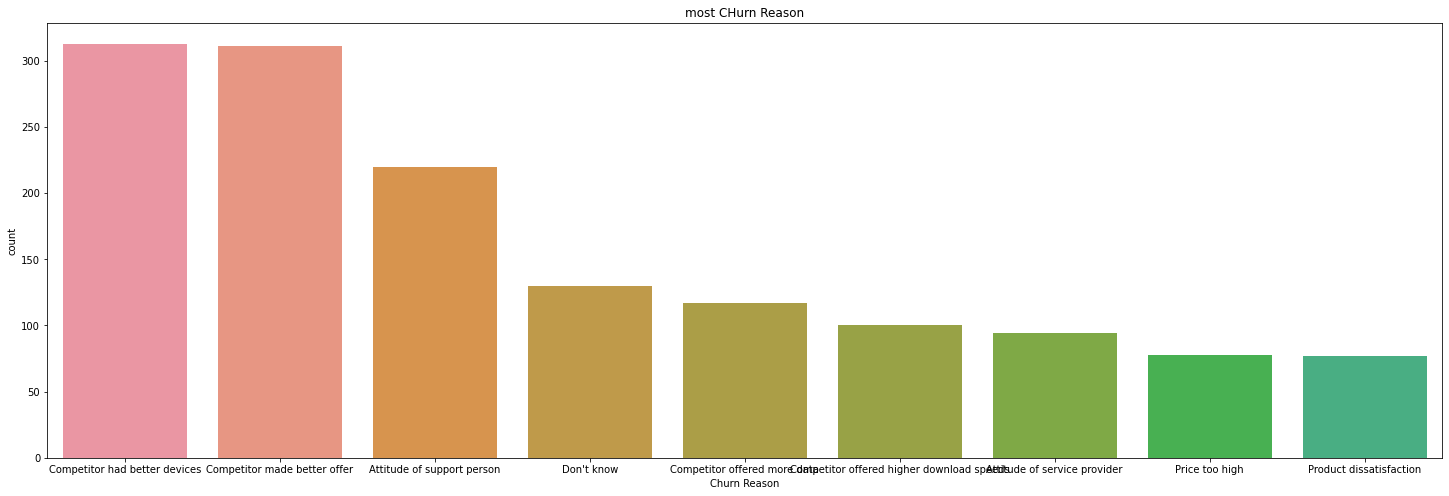

In [55]:
plt.figure(figsize=(25,8))
a=sns.countplot(data=df,x='Churn Reason',order=df['Churn Reason'].value_counts().index)
a.set_xlim(-0.5,8.5)
a.set_title("most CHurn Reason")
plt.show()

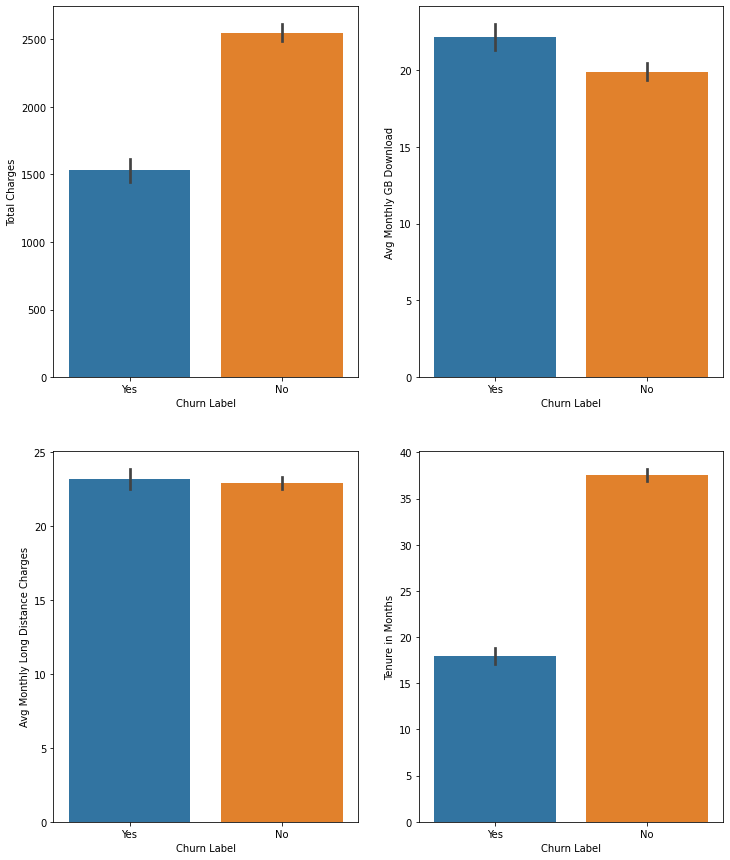

In [56]:
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.barplot(data=df,x='Churn Label',y='Total Charges',ax=axes[0,0])
sns.barplot(data=df,x='Churn Label',y='Avg Monthly GB Download',ax=axes[0,1])
sns.barplot(data=df,x='Churn Label',y='Avg Monthly Long Distance Charges',ax=axes[1,0])
sns.barplot(data=df,x='Churn Label',y='Tenure in Months',ax=axes[1,1])

In [163]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.0, 55.0)

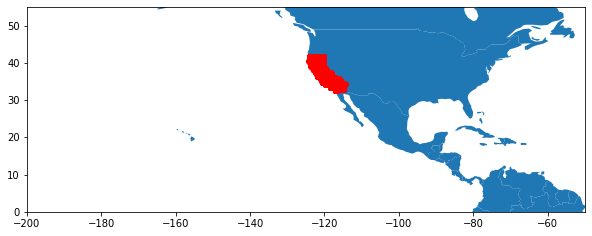

In [176]:
#see location of customer
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

plt.xlim(-200,-50)
plt.ylim(0,55)



##**Conclusion**
*   dataset contain **7043** Records
* dataset contain **59** Features
* datatype varies between **object,int and float**
* There are **10348** nullvalues 
* All null values are in **Churn reason and Churn category** with ratio 1:1
*  There are no Duplicates

---

| Feature | Most |
| --- | --- |
| Multiple Lines | No |
| Internet Service | إyes |
| Online Secuirty | No |
| Intrnet Type | Fiber Optics |
| Offers | B & E |
| Phone Service  | Yes |
| Online Backub | No |
| Contract | Month to Month |
| Paperless Billing | Yes |
| Unlimited data | Yes |
| Streaming Music | No |
| Payment Method | Bank withdrawal |
| Device Poretiction | No |
| Device Poretiction | No |
| Device Poretiction | No |

---
* Revenue are directly proptional with tensor in month
* AVG monthly GB from  0 t 60 
* Monthly Charge from  0 t 120 **
* Total charges from  0 t  4000 
* most of customer are over 30 and below 60 in age
* The ratio between male and female , married or not are nearly equal
* Number of dependts are nearly equal
* when churn score is over 80 churn label is yes














# Cleaning Data

In [82]:
df.columns


Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Value', 'CLTV', 'City',
       'Zip Code', 'Population', 'Gender', 'Age', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Partner', 'Tenure Months',
       'Device Protection', 'Tech Support'],
      dtype='object')

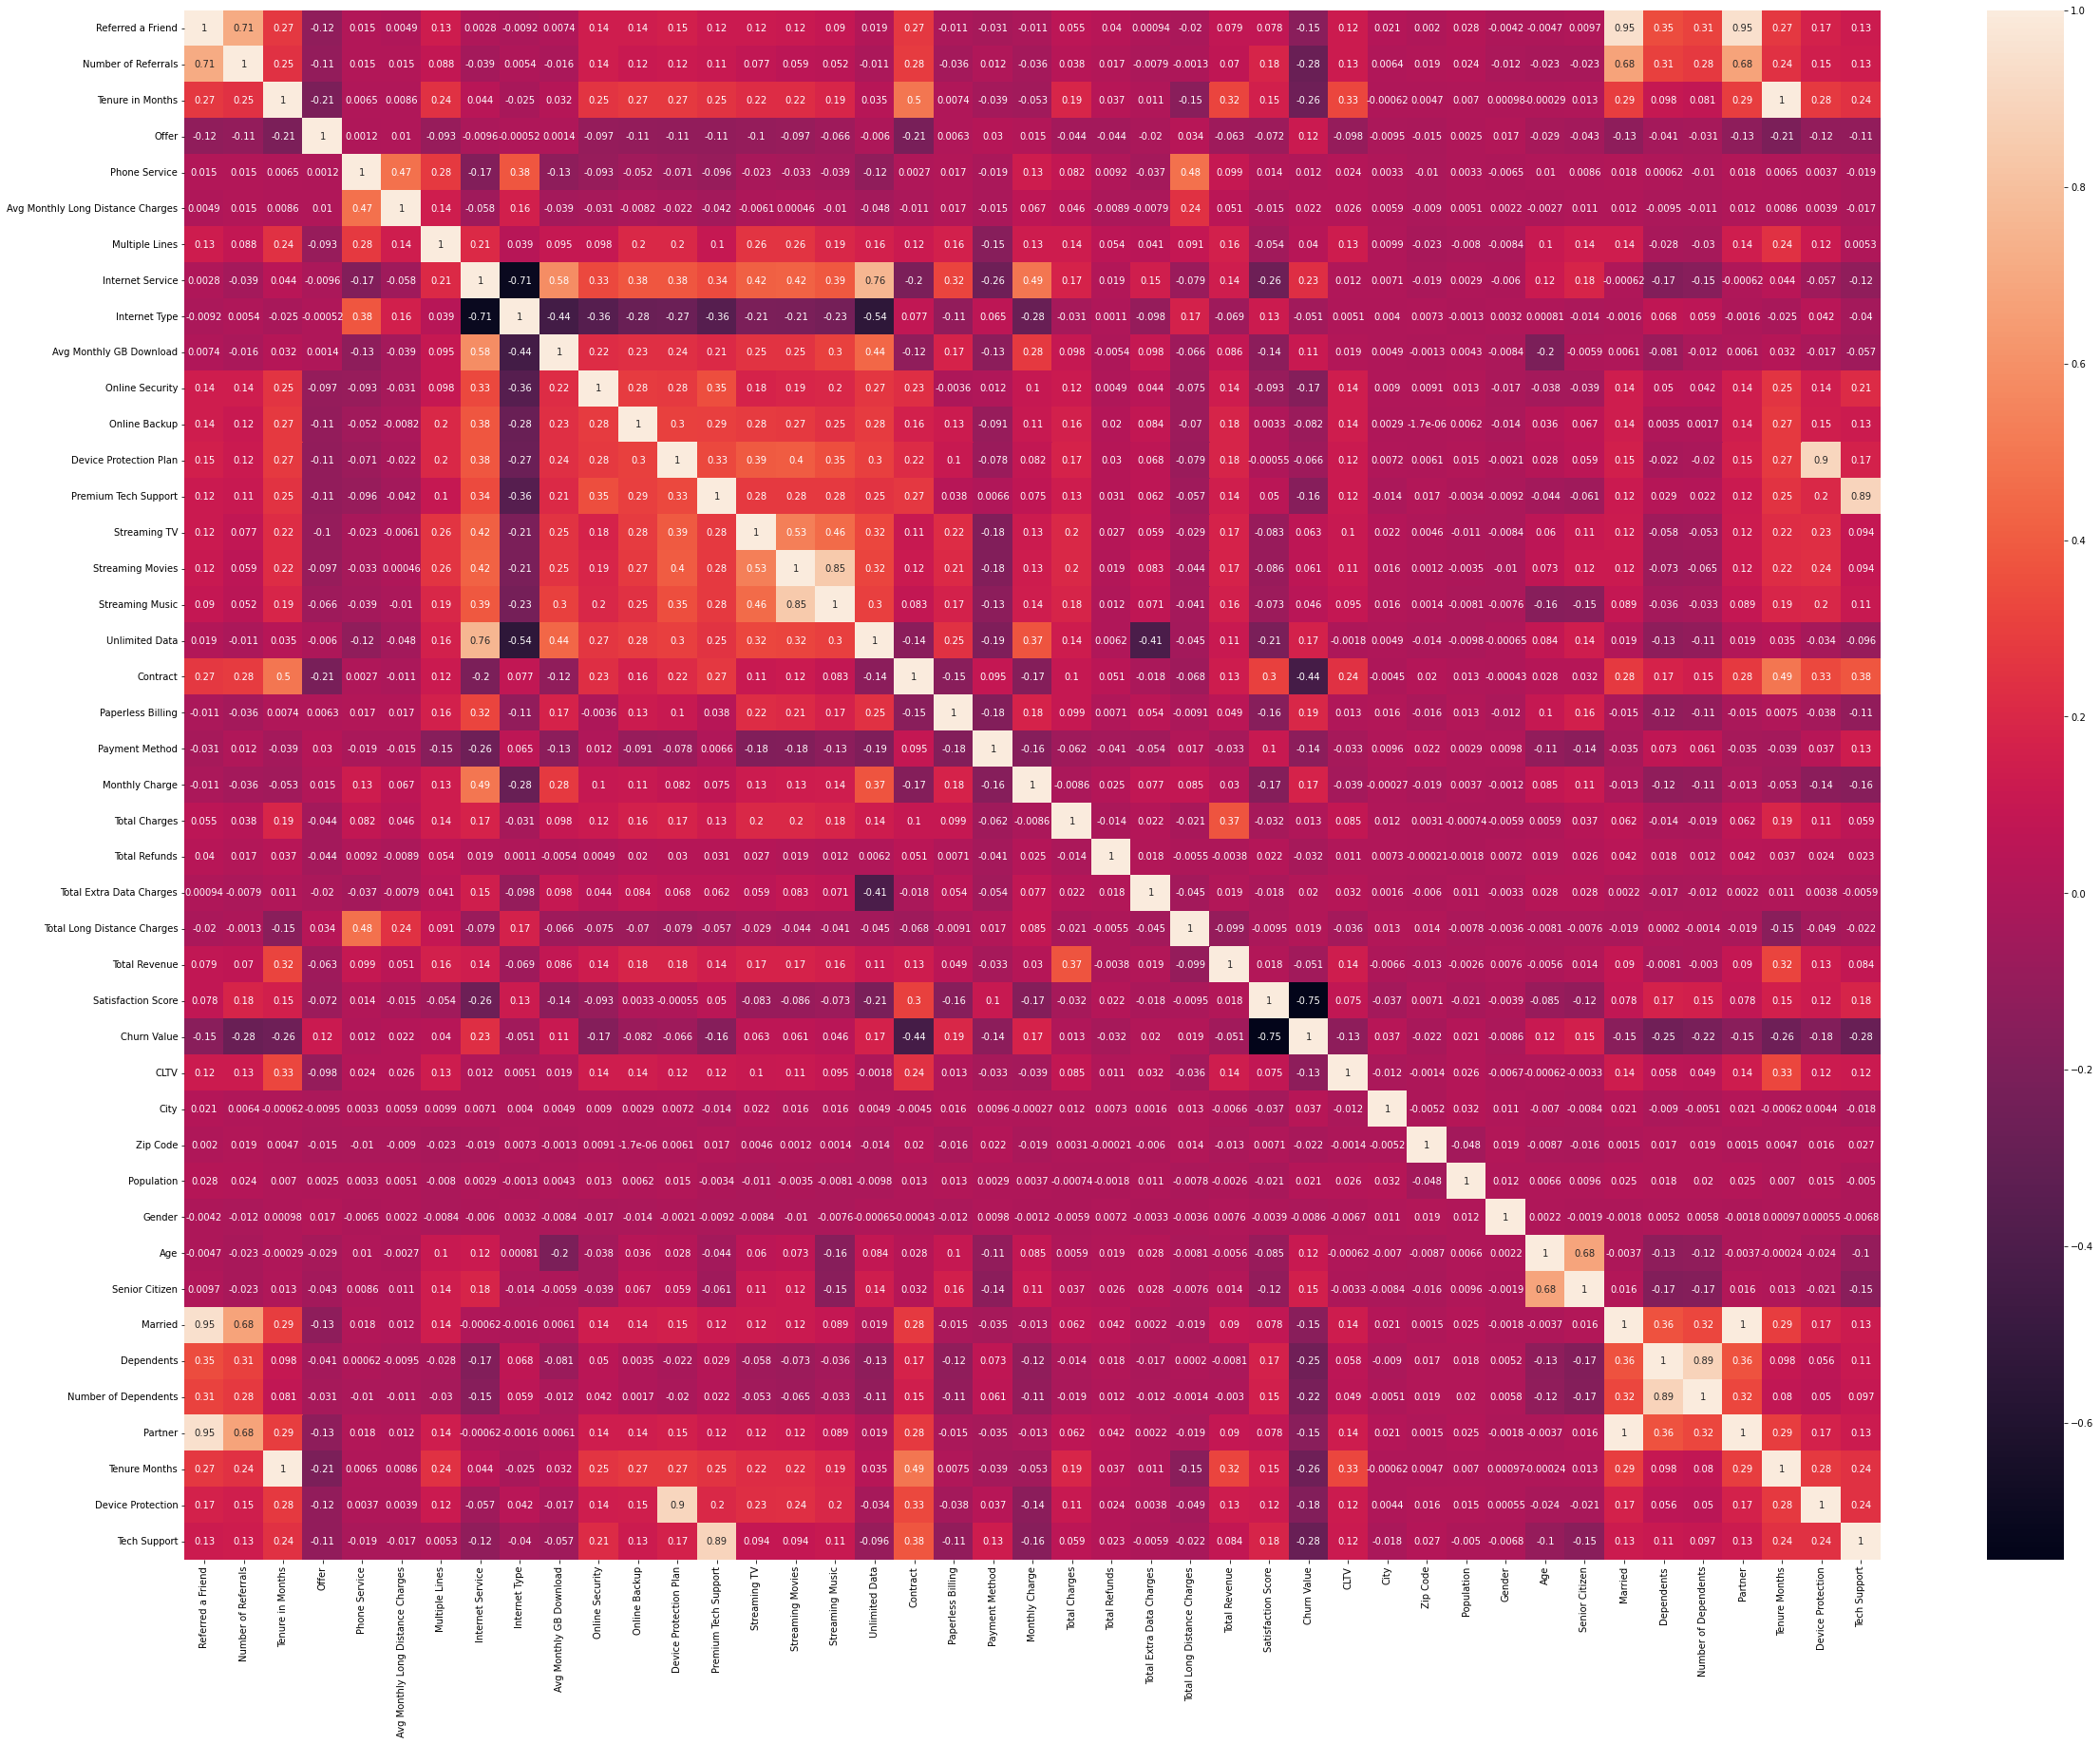

In [83]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)


In [96]:
df=df.drop(['Country', 'State','Latitude','ID','Churn Label','Churn Category','Churn Reason'],axis=1)


In [97]:
df=df.drop(['Lat Long', 'Longitude','Under 30','Customer ID', 'Count', 'Quarter'],axis=1)



In [98]:
df=df.drop(['Churn Score','Customer Status'],axis=1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

#Classification Model

In [118]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [119]:
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Age,Senior Citizen,Married,Dependents,Number of Dependents,Partner,Tenure Months,Device Protection,Tech Support,Monthly Charges
0,0,0,0,0,0,0,0,1,1,41,...,55,1,0,0,0,0,1,2,0,1077
1,1,1,68,5,1,2366,1,1,2,48,...,51,1,1,1,1,1,69,0,0,244
2,0,0,71,4,1,868,1,1,2,27,...,48,1,0,1,3,0,2,0,0,560
3,1,1,9,3,1,3355,0,1,2,23,...,55,1,1,1,1,1,10,2,0,620
4,1,1,24,3,1,2576,1,1,2,45,...,58,1,1,1,1,1,25,0,0,160


In [120]:

df['Churn Value']

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7043, dtype: int64

In [121]:
x=df.drop('Churn Value',axis=1)
y=df['Churn Value']

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [123]:
#function to check Errors
def check_Errors(ytest,ypred):
  from sklearn import metrics

  accuracy=metrics.accuracy_score(ytest,ypred)
  precision=metrics.precision_score(ytest,ypred)
  f1_score=metrics.f1_score(ytest,ypred)
  recall=metrics.recall_score(ytest,ypred)

  print(f"Accuracy score of model is: {100*accuracy:.3} %")
  print(f"precision score of model is: {100*precision:.3} %")
  print(f"f1_score score of model is: {100*f1_score:.3} %")
  print(f"recall score of model is: {100*recall:.3} %")

In [124]:
#function to plot ROC curve and get AUC
def plot_roc(ytest,ypredp):
  from sklearn.metrics import roc_curve,roc_auc_score
  fbr,tbr,thresholds=roc_curve(ytest,ypredp[:,1])
  plt.plot(fbr,tbr)
  plt.plot([0,1],[0,1],'k--',c='red')
  plt.xlabel("False Postive Rate")
  plt.ylabel("True Postive Rate")
  plt.title("ROC Curve")
  plt.show()
  print('______________________________________________________________')
  print(" ")
  auc=roc_auc_score(ytest,ypredp[:,1])
  print(f"AUC is: {100*auc:.3} %")

In [125]:
#function to get confusion matrix
def get_confm(ytest,ypred):
  from sklearn.metrics import confusion_matrix
  conf_m=confusion_matrix(ytest,ypred)
  sns.heatmap(conf_m,annot=True).set_title("Confusion Matrix")

In [126]:
#function to get classification report
def get_report(ytest,ypred):
  from sklearn.metrics import classification_report
  print(classification_report(ytest,ypred))

In [127]:
#func to check model
def check_model(ytest,ypred):
   get_report(ytest,ypred)
   print("______________________________________________________________________________")  
   print(" ")
   get_confm(ytest,ypred)
   print(" ")
   check_Errors(ytest,ypred)
   print(" ")
   print("______________________________________________________________________________")  
   print(" ")


##KNN Model

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

Text(0, 0.5, 'Error_rate')

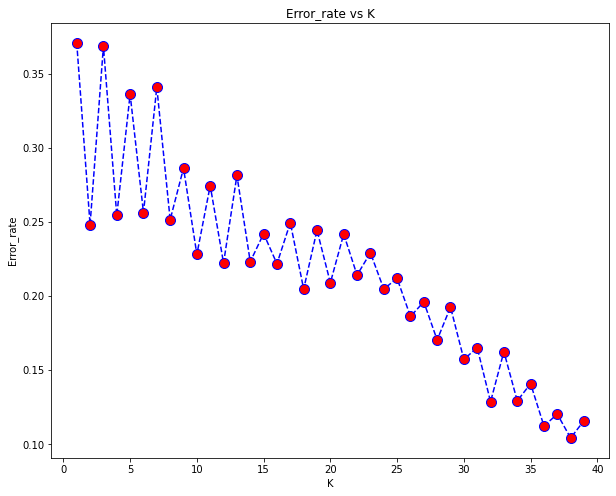

In [129]:
#hypertuning the model
from sklearn import metrics
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(metrics.f1_score(y_test,pred_i))
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,'bo--',markerfacecolor='red',markersize='10')
plt.title("Error_rate vs K")
plt.xlabel("K")
plt.ylabel("Error_rate")

In [130]:
accuracy=metrics.accuracy_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
recall=metrics.recall_score(y_test,y_pred)

print(f"Accuracy score of model is: {100*accuracy:.3} %")
print(f"precision score of model is: {100*precision:.3} %")
print(f"f1_score score of model is: {100*f1_score:.3} %")
print(f"recall score of model is: {100*recall:.3} %")

Accuracy score of model is: 71.4 %
precision score of model is: 46.8 %
f1_score score of model is: 33.6 %
recall score of model is: 26.2 %


## SVM Model

In [131]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1020
           1       0.00      0.00      0.00       389

    accuracy                           0.72      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.52      0.72      0.61      1409

______________________________________________________________________________
 
 
Accuracy score of model is: 72.4 %
precision score of model is: 0.0 %
f1_score score of model is: 0.0 %
recall score of model is: 0.0 %
 
______________________________________________________________________________
 


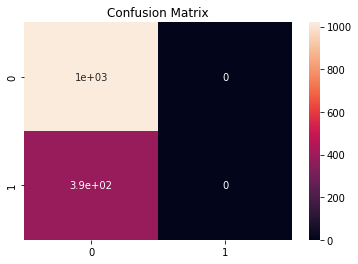

In [132]:
check_model(y_test,y_pred)

##Naive Bias

In [150]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

nb_model.fit(x_train,y_train)

y_pred=nb_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1020
           1       0.67      0.86      0.76       389

    accuracy                           0.85      1409
   macro avg       0.81      0.85      0.82      1409
weighted avg       0.87      0.85      0.85      1409

______________________________________________________________________________
 
 
Accuracy score of model is: 84.7 %
precision score of model is: 67.4 %
f1_score score of model is: 75.6 %
recall score of model is: 86.1 %
 
______________________________________________________________________________
 


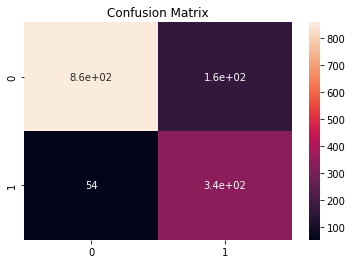

In [151]:
check_model(y_test,y_pred)

In [153]:
y_predp=nb_model.predict_proba(x_test)

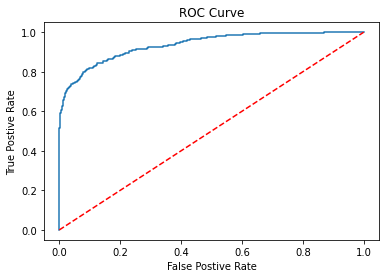

______________________________________________________________
 
AUC is: 93.6 %


In [154]:
plot_roc(y_test,y_predp)

## Decsion Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()

dt_model.fit(x_train,y_train)

y_pred=dt_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1020
           1       0.88      0.93      0.91       389

    accuracy                           0.95      1409
   macro avg       0.93      0.94      0.93      1409
weighted avg       0.95      0.95      0.95      1409

______________________________________________________________________________
 
 
Accuracy score of model is: 94.6 %
precision score of model is: 88.1 %
f1_score score of model is: 90.5 %
recall score of model is: 93.1 %
 
______________________________________________________________________________
 


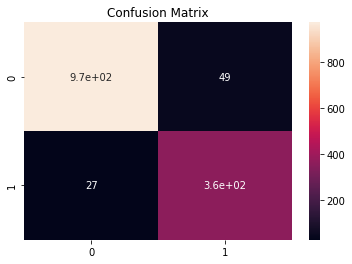

In [134]:
check_model(y_test,y_pred)

In [135]:
y_predp=dt_model.predict_proba(x_test)

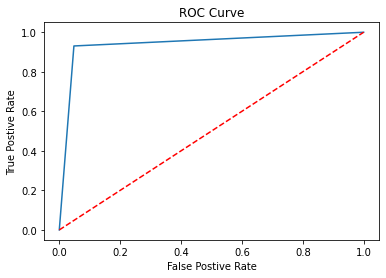

______________________________________________________________
 
AUC is: 94.1 %


In [136]:
plot_roc(y_test,y_predp)

## Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier()

RF_model.fit(x_train,y_train)

y_pred=RF_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1020
           1       0.98      0.89      0.94       389

    accuracy                           0.97      1409
   macro avg       0.97      0.94      0.96      1409
weighted avg       0.97      0.97      0.97      1409

______________________________________________________________________________
 
 
Accuracy score of model is: 96.6 %
precision score of model is: 98.3 %
f1_score score of model is: 93.5 %
recall score of model is: 89.2 %
 
______________________________________________________________________________
 


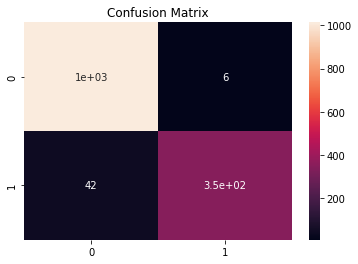

In [138]:
check_model(y_test,y_pred)


In [147]:
y_predp=RF_model.predict_proba(x_test)


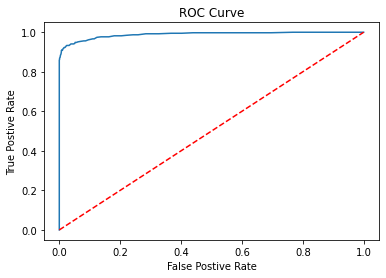

______________________________________________________________
 
AUC is: 98.9 %


In [148]:
plot_roc(y_test,y_predp)

##Bagging Model

In [177]:
from sklearn.ensemble import VotingClassifier

f_model=VotingClassifier(estimators=[('DT',dt_model),('KNN',knn_model),('XGB',xgb_model),('RF',RF_model)],weights=[2,1,4,3],voting='soft')

f_model.fit(x_train,y_train)

y_pred=f_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1020
           1       0.96      0.92      0.94       389

    accuracy                           0.97      1409
   macro avg       0.97      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

______________________________________________________________________________
 
 
Accuracy score of model is: 96.7 %
precision score of model is: 96.2 %
f1_score score of model is: 93.8 %
recall score of model is: 91.5 %
 
______________________________________________________________________________
 


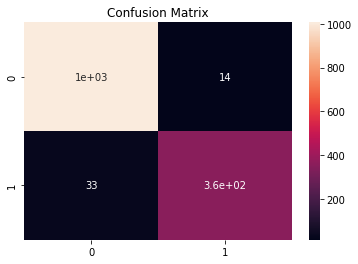

In [178]:
check_model(y_test,y_pred)

In [179]:
y_predp=f_model.predict_proba(x_test)

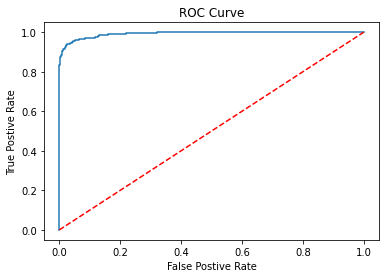

______________________________________________________________
 
AUC is: 99.2 %


In [180]:
plot_roc(y_test,y_predp)

## XGBOOST

In [141]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_train,y_train)

y_pred=xgb_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1020
           1       0.96      0.92      0.94       389

    accuracy                           0.97      1409
   macro avg       0.96      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

______________________________________________________________________________
 
 
Accuracy score of model is: 96.7 %
precision score of model is: 96.0 %
f1_score score of model is: 94.0 %
recall score of model is: 92.0 %
 
______________________________________________________________________________
 


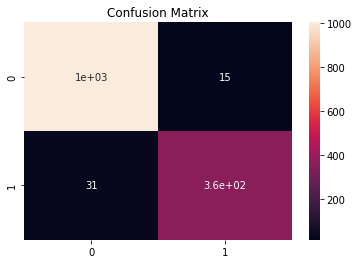

In [142]:
check_model(y_test,y_pred)

In [145]:
y_predp=xgb_model.predict_proba(x_test)

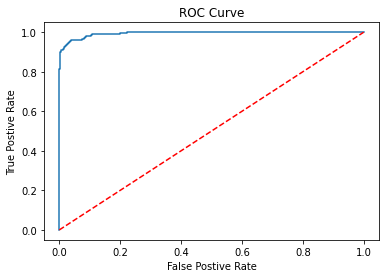

______________________________________________________________
 
AUC is: 99.4 %


In [146]:
plot_roc(y_test,y_predp)